In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv("UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df.shape

(30000, 25)

In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


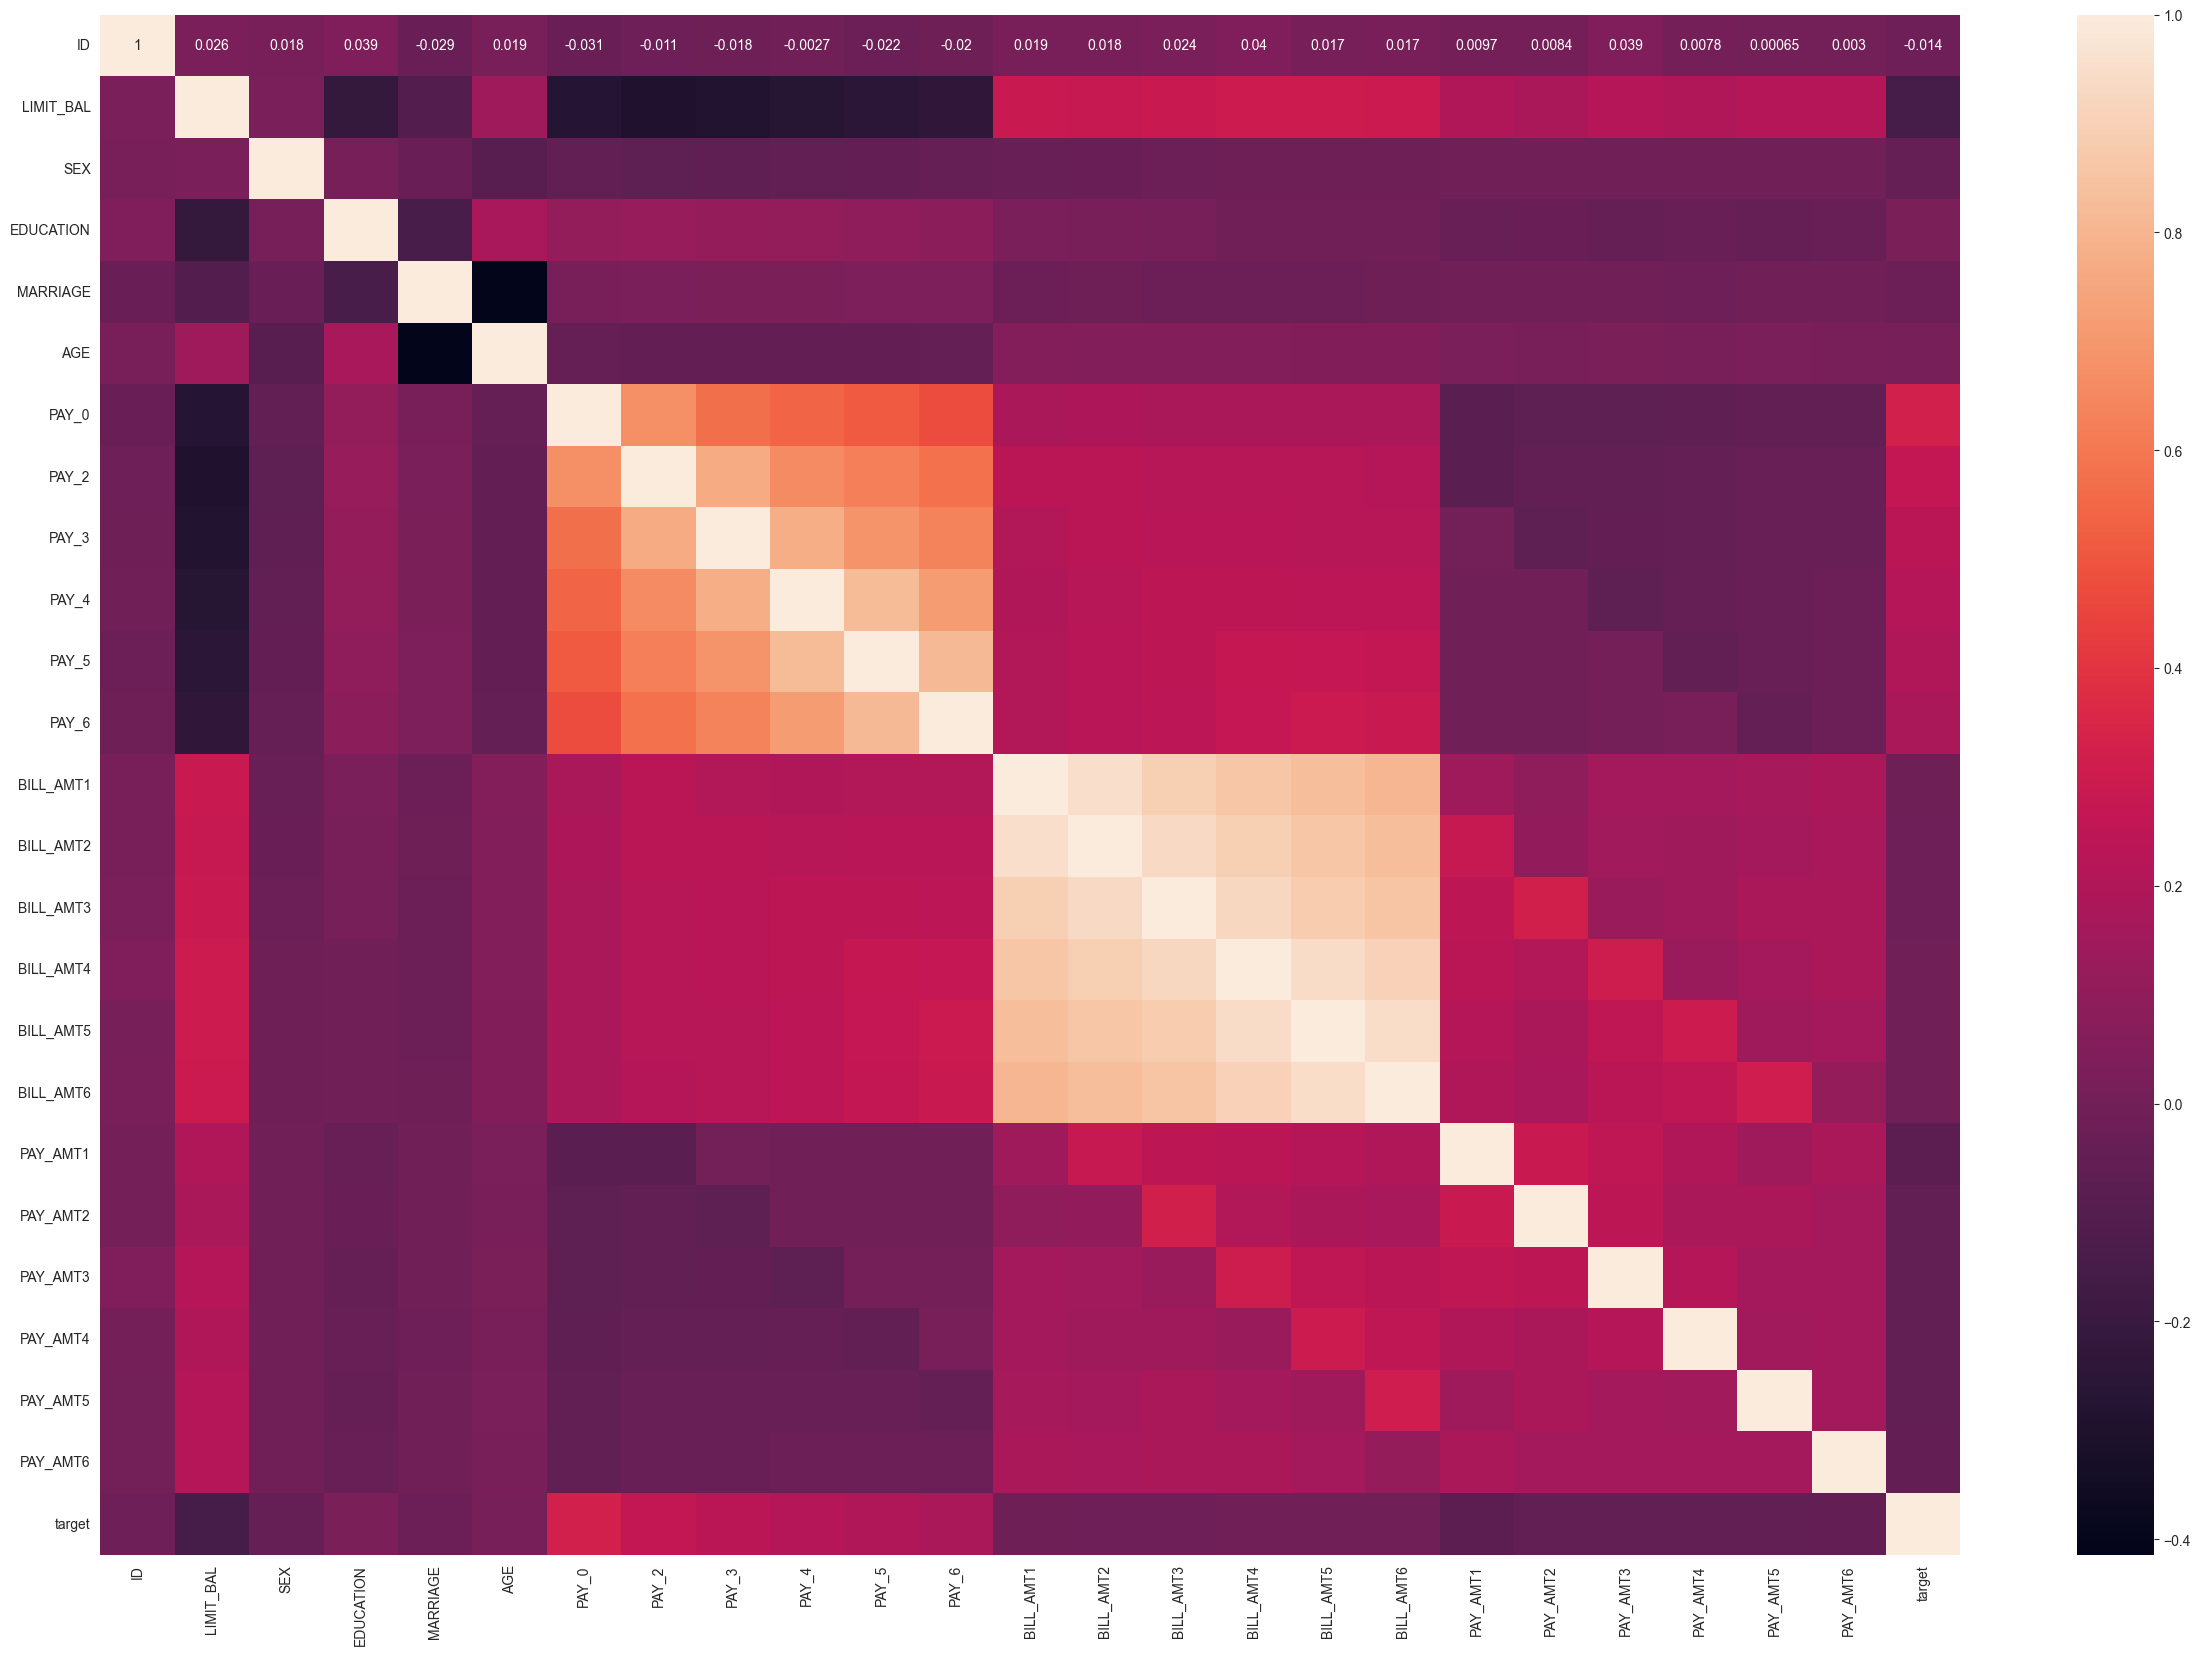

In [5]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: >

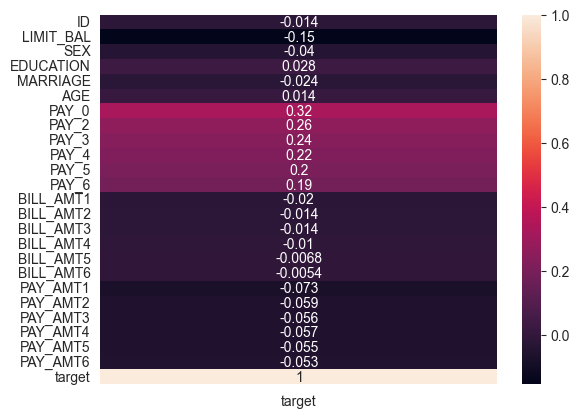

In [7]:
corr = df.corr()[['target']]
sns.heatmap(corr, annot=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [9]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
target       0
dtype: int64

# Data Pre-Processing

# EDA

target

In [14]:
df.rename(columns ={"default.target": "default"}, inplace = True)

In [17]:
df["target"].unique()

array([1, 0], dtype=int64)

In [19]:
df["target"].value_counts()

target
0    23364
1     6636
Name: count, dtype: int64

Text(0.5, 1.0, 'target')

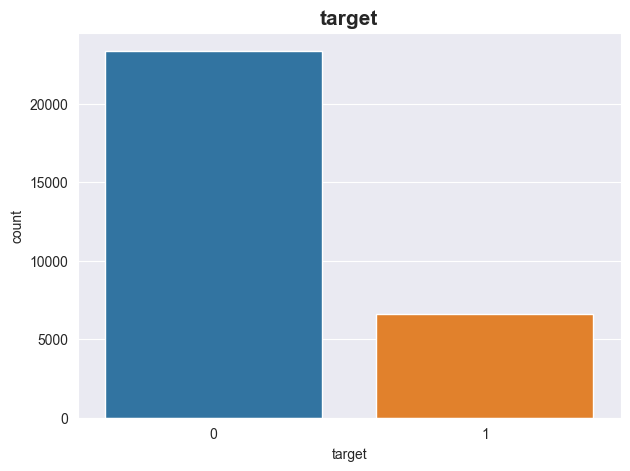

In [21]:
# 0= no default, 1= default
plt.figure(figsize=(7,5))
sns.countplot(x="target",order=[0,1],data=df).set_title("target",fontsize=15,fontdict={"weight": "bold"})

# Sex

In [22]:
df["SEX"].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

Text(0.5, 1.0, 'Sex')

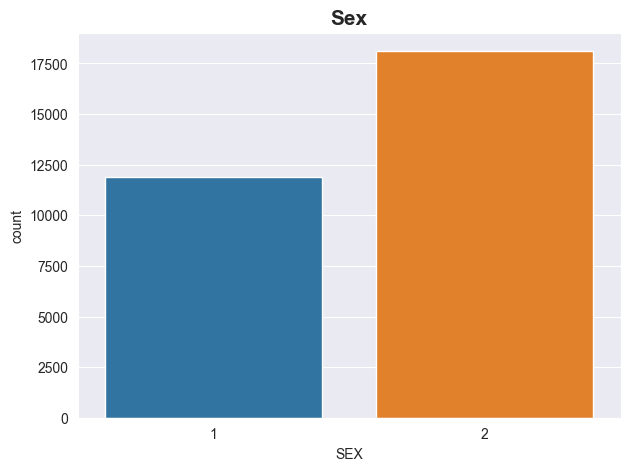

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Sex')

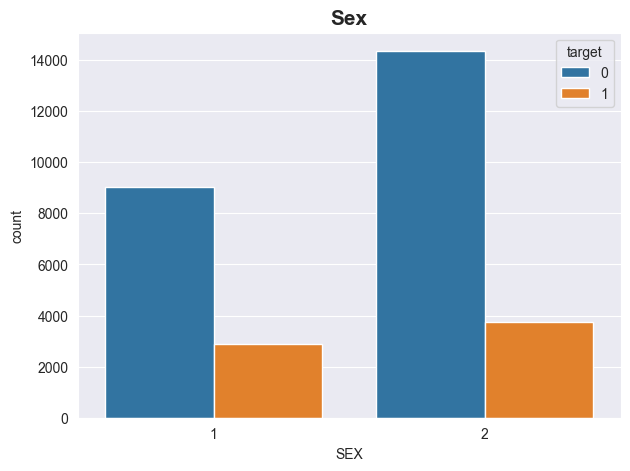

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x="SEX",order=[1,2],hue="target",data=df).set_title("Sex",fontsize=15,fontdict={"weight": "bold"})

 MARRIAGE

In [26]:
df["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [27]:
df["MARRIAGE"].value_counts(ascending=True)

MARRIAGE
0       54
3      323
1    13659
2    15964
Name: count, dtype: int64

Text(0.5, 1.0, 'Marriage')

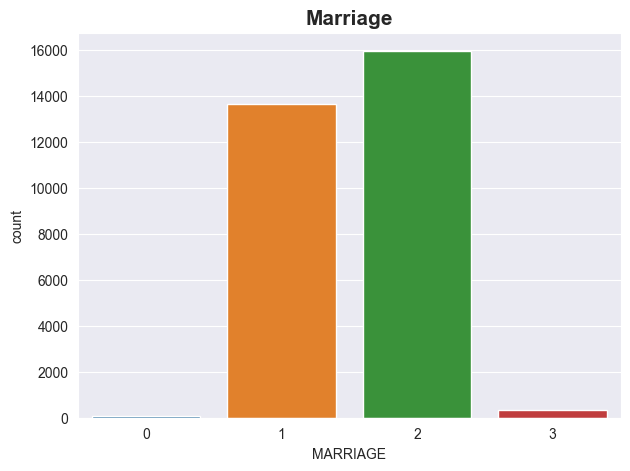

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x="MARRIAGE",order=[0,1,2,3],data=df).set_title("Marriage",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'Marriage')

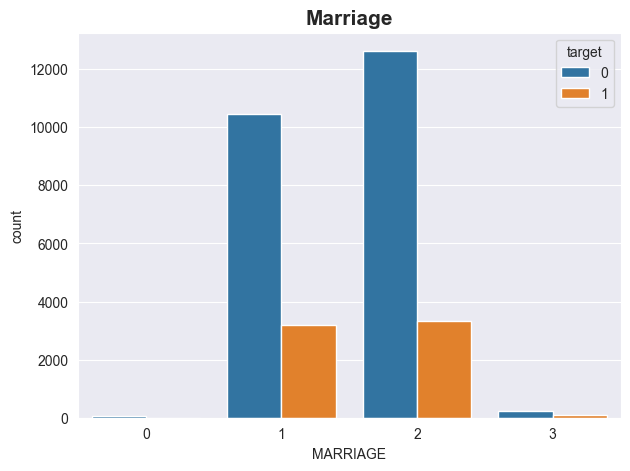

In [29]:
plt.figure(figsize=(7,5))
sns.countplot(x="MARRIAGE",order=[0,1,2,3],hue="target",data=df).set_title("Marriage",fontsize=15,fontdict={"weight": "bold"})

EDUCATION

In [30]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [31]:
df["EDUCATION"].value_counts(ascending=True)

EDUCATION
0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: count, dtype: int64

Text(0.5, 1.0, 'EDUCATION')

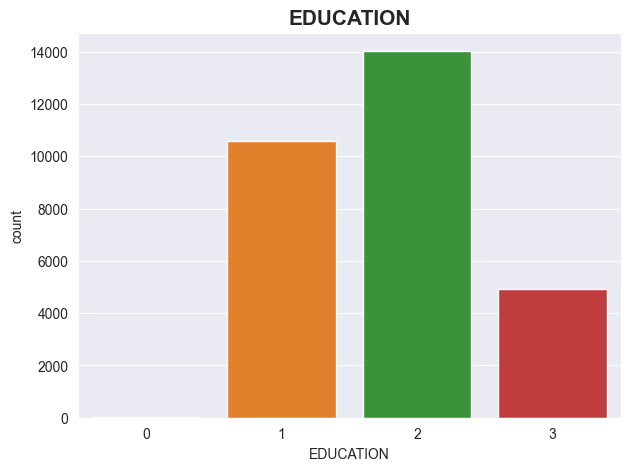

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x="EDUCATION",order=[0,1,2,3],data=df).set_title("EDUCATION",fontsize=15,fontdict={"weight": "bold"})

Text(0.5, 1.0, 'EDUCATION')

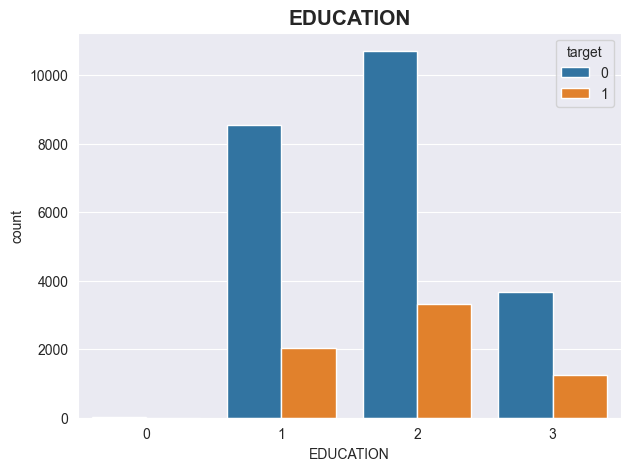

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x="EDUCATION",order=[0,1,2,3],hue="target",data=df).set_title("EDUCATION",fontsize=15,fontdict={"weight": "bold"})

Age

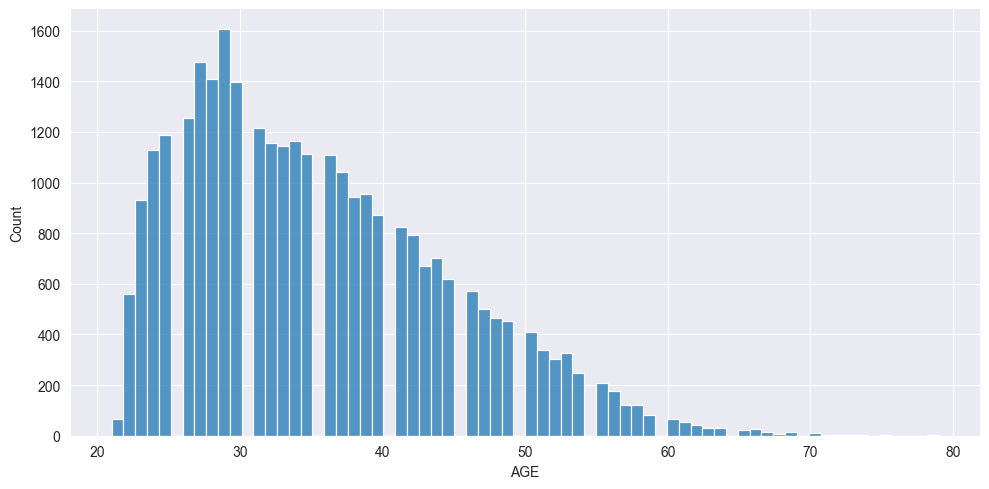

In [35]:
sns.displot(data=df, x="AGE",height=5, aspect=2)

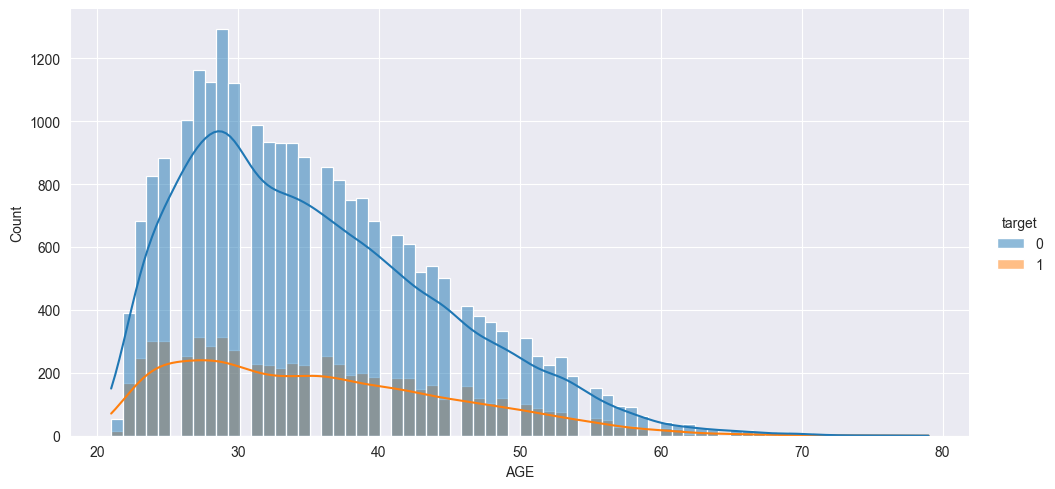

In [36]:
sns.displot(data=df, x="AGE",hue="target",kde=True,height=5, aspect=2)

Limit_Bal

<Axes: xlabel='target', ylabel='LIMIT_BAL'>

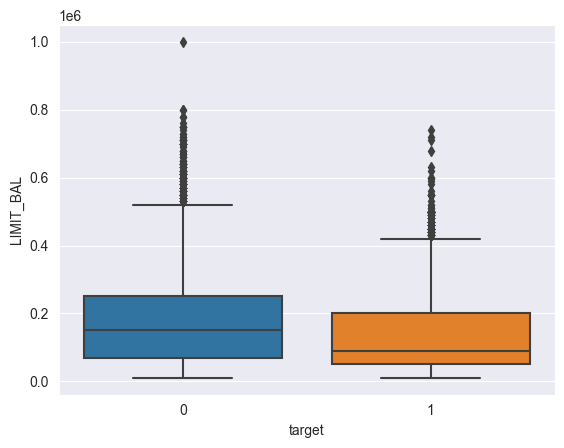

In [37]:
sns.boxplot(x="target",y="LIMIT_BAL",data=df)

PAY_O

In [38]:
df["PAY_0"].unique()

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6], dtype=int64)

In [39]:
df["PAY_0"].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

<Axes: xlabel='PAY_0', ylabel='count'>

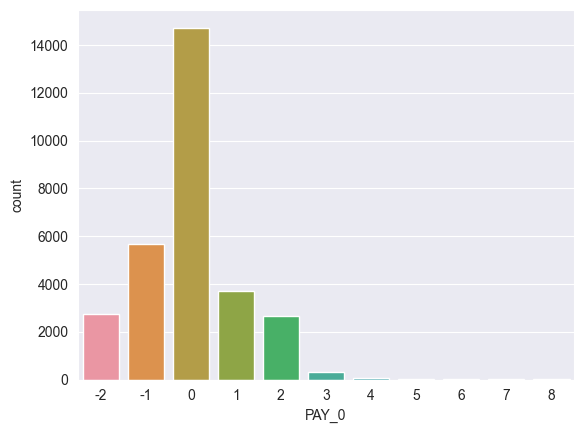

In [40]:
sns.countplot(x="PAY_0",data=df)

PAY_2

In [41]:
df["PAY_2"].unique()

array([ 2,  0, -1, -2,  3,  5,  7,  4,  1,  6,  8], dtype=int64)

In [42]:
df["PAY_2"].value_counts()

PAY_2
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64

<Axes: xlabel='PAY_2', ylabel='count'>

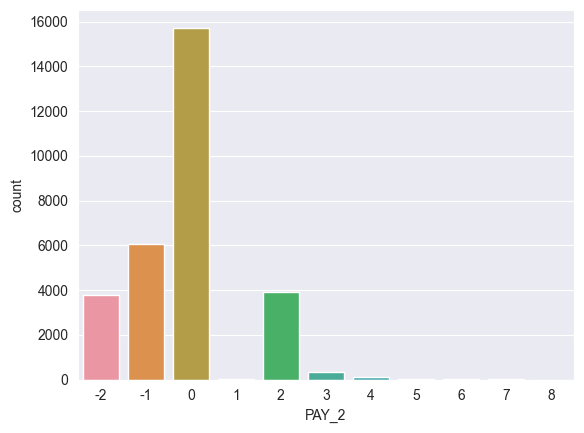

In [43]:
sns.countplot(x="PAY_2",data=df)

PAY_3

In [44]:
df["PAY_3"].unique()

array([-1,  0,  2, -2,  3,  4,  6,  7,  1,  5,  8], dtype=int64)

In [45]:
df["PAY_3"].value_counts()

PAY_3
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64

<Axes: xlabel='PAY_3', ylabel='count'>

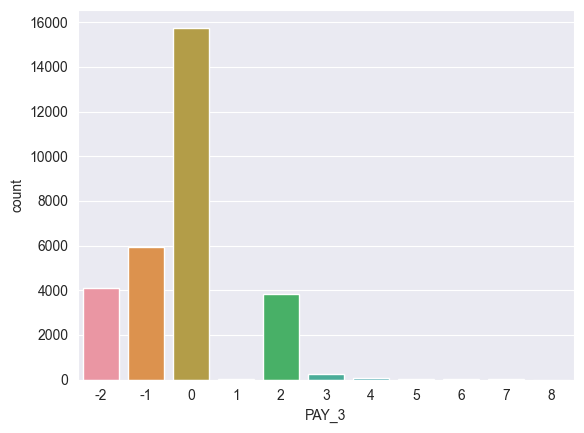

In [46]:
sns.countplot(x="PAY_3",data=df)

PAY_4

In [47]:
df["PAY_4"].unique()

array([-1,  0, -2,  2,  3,  4,  5,  7,  6,  1,  8], dtype=int64)

In [48]:
df["PAY_4"].value_counts()

PAY_4
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64

<Axes: xlabel='PAY_4', ylabel='count'>

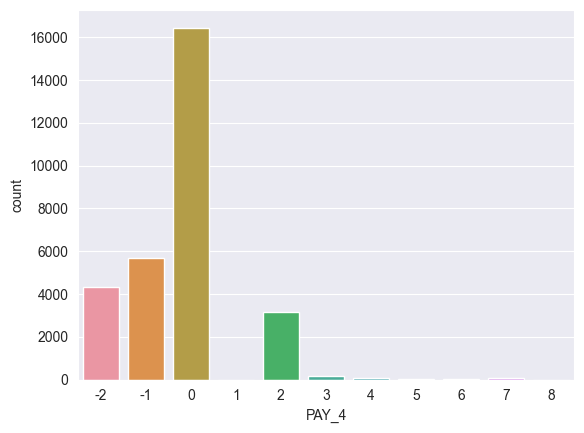

In [49]:
sns.countplot(x="PAY_4",data=df)

PAY_5

In [50]:
df["PAY_5"].unique()

array([-2,  0, -1,  2,  3,  5,  4,  7,  8,  6], dtype=int64)

In [51]:
df["PAY_5"].value_counts()

PAY_5
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64

<Axes: xlabel='PAY_5', ylabel='count'>

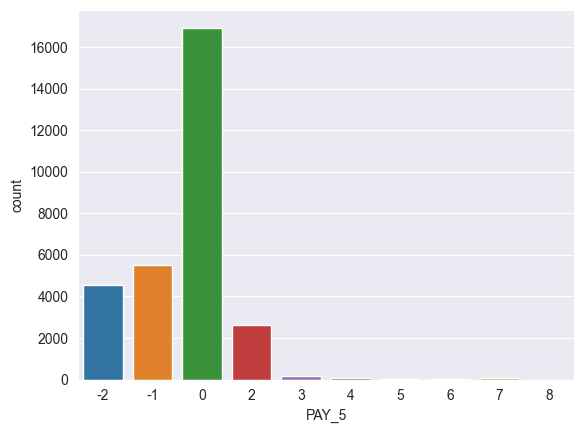

In [52]:
sns.countplot(x="PAY_5",data=df)

PAY_6

In [53]:
df["PAY_6"].unique()

array([-2,  2,  0, -1,  3,  6,  4,  7,  8,  5], dtype=int64)

In [55]:
df["PAY_6"].value_counts()

PAY_6
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64

<Axes: xlabel='PAY_6', ylabel='count'>

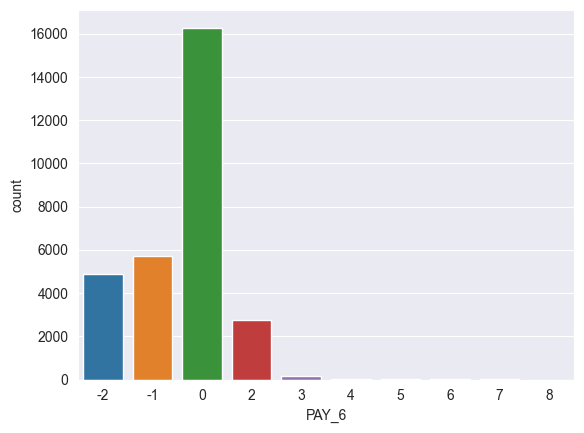

In [56]:
sns.countplot(x="PAY_6",data=df)

BILL_AMT1

<Axes: xlabel='target', ylabel='BILL_AMT1'>

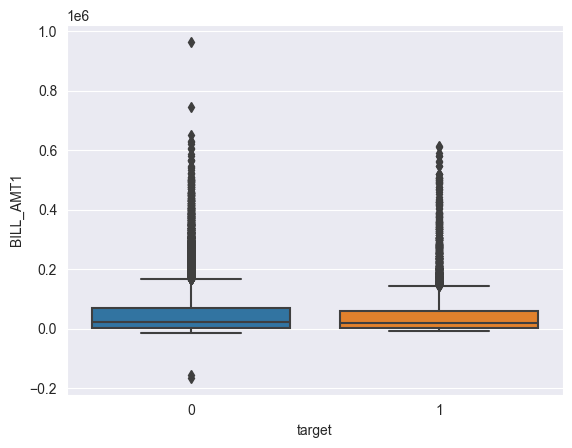

In [57]:
sns.boxplot(x="target",y="BILL_AMT1",data=df)

BILL_AMT2

<Axes: xlabel='target', ylabel='BILL_AMT2'>

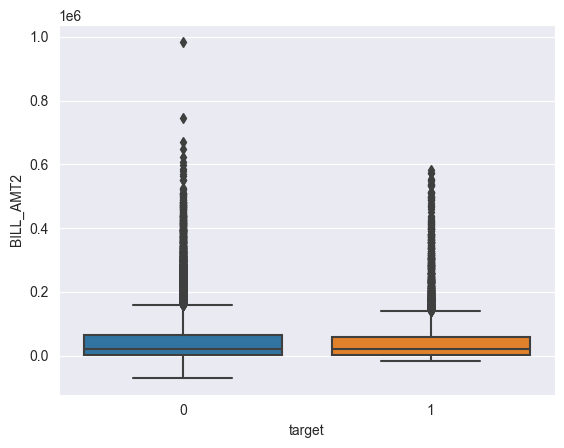

In [58]:
sns.boxplot(x="target",y="BILL_AMT2",data=df)

BILL_AMT3

<Axes: xlabel='target', ylabel='BILL_AMT3'>

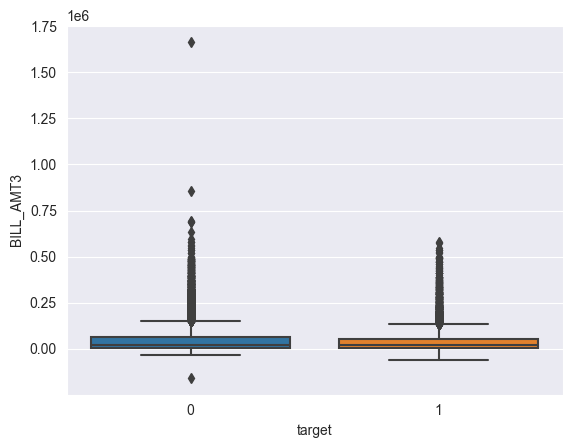

In [60]:
sns.boxplot(x="target",y="BILL_AMT3",data=df)

BILL_AMT4

<Axes: xlabel='target', ylabel='BILL_AMT4'>

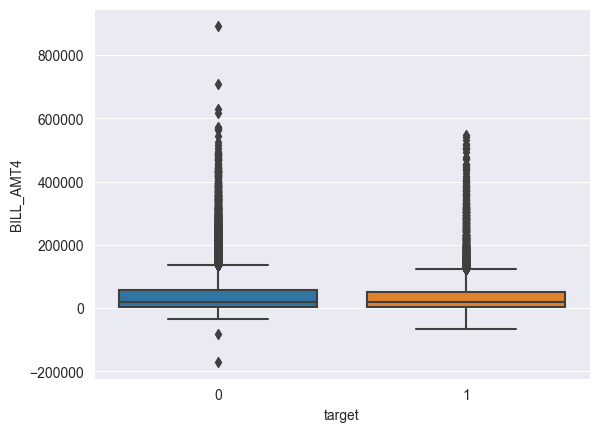

In [61]:
sns.boxplot(x="target",y="BILL_AMT4",data=df)

BILL_AMT5

<Axes: xlabel='target', ylabel='BILL_AMT5'>

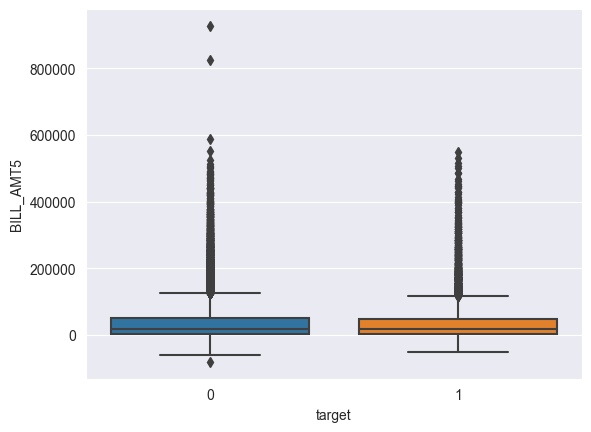

In [63]:
sns.boxplot(x="target",y="BILL_AMT5",data=df)

BILL_AMT6

<Axes: xlabel='target', ylabel='BILL_AMT6'>

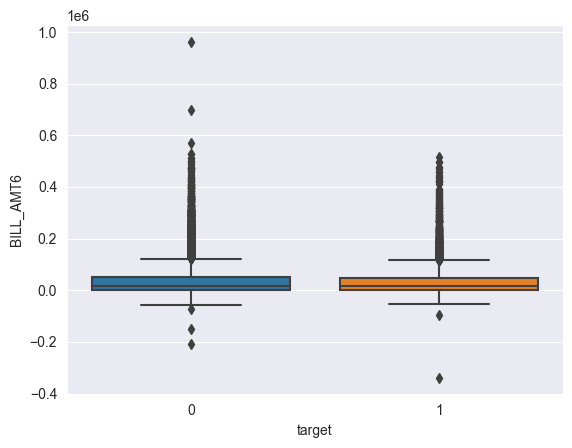

In [64]:
sns.boxplot(x="target",y="BILL_AMT6",data=df)

PAY_AMT1

<Axes: xlabel='target', ylabel='PAY_AMT1'>

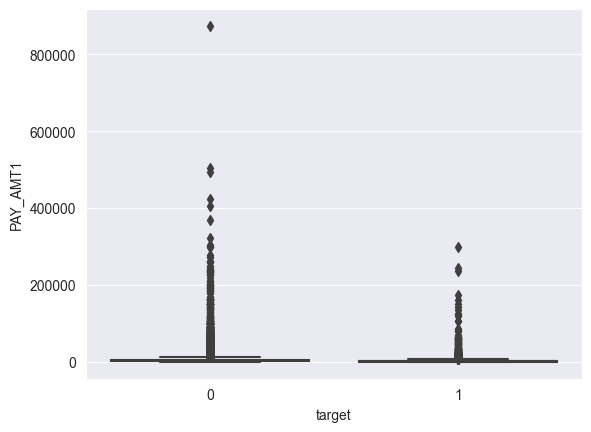

In [66]:
sns.boxplot(x="target",y="PAY_AMT1",data=df)

PAY_AMT2

<Axes: xlabel='target', ylabel='PAY_AMT2'>

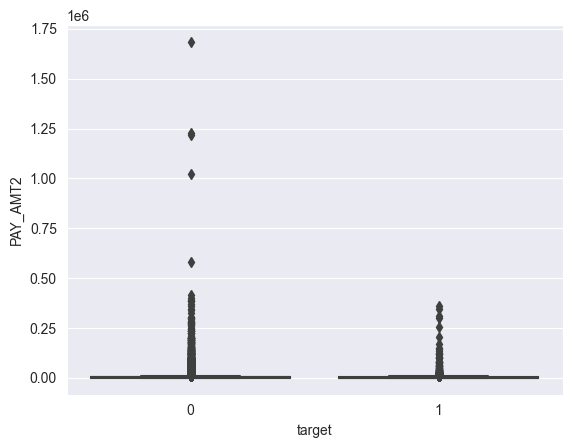

In [67]:
sns.boxplot(x="target",y="PAY_AMT2",data=df)

PAY_AMT3

<Axes: xlabel='target', ylabel='PAY_AMT3'>

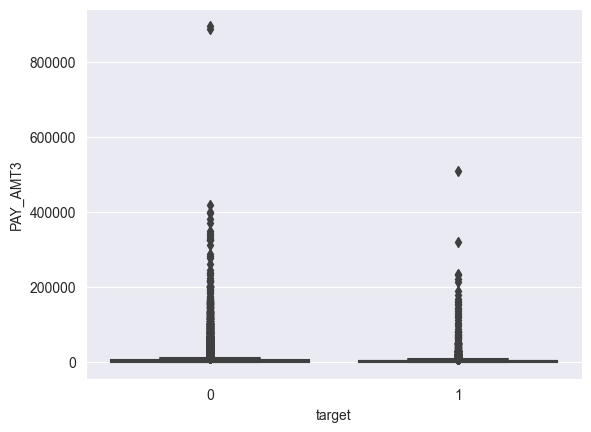

In [68]:
sns.boxplot(x="target",y="PAY_AMT3",data=df)

PAY_AMT4

<Axes: xlabel='target', ylabel='PAY_AMT4'>

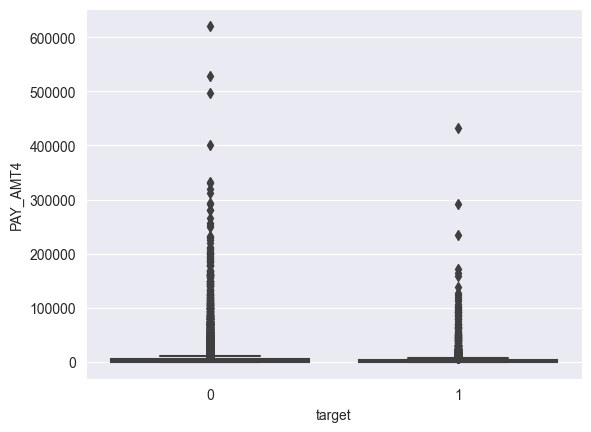

In [69]:
sns.boxplot(x="target",y="PAY_AMT4",data=df)

PAY_AMT5

<Axes: xlabel='target', ylabel='PAY_AMT5'>

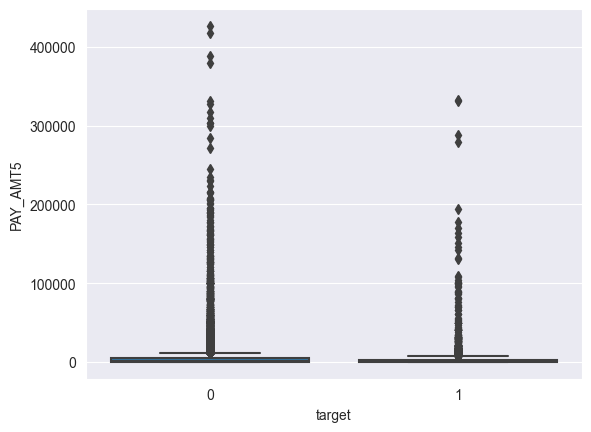

In [70]:
sns.boxplot(x="target",y="PAY_AMT5",data=df)

PAY_AMT6

<Axes: xlabel='target', ylabel='PAY_AMT6'>

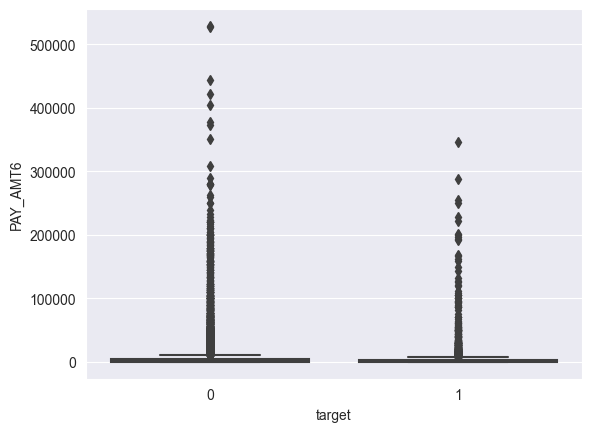

In [71]:
sns.boxplot(x="target",y="PAY_AMT6",data=df)

# Feature Engineering

Outlier Handling on LIMIT_BAL

In [72]:
df_default_1=df[df["target"]==1]

In [74]:
df_default_1.shape

(6636, 25)

In [75]:
max_thresold=df_default_1["LIMIT_BAL"].quantile(0.95)
max_thresold

360000.0

In [76]:
df_default_1[df_default_1["LIMIT_BAL"]<max_thresold].shape[0]

6188

In [77]:
df_default_1=df_default_1[df_default_1["LIMIT_BAL"]<max_thresold]

In [78]:
df_default_1.shape

(6188, 25)

<Axes: xlabel='LIMIT_BAL'>

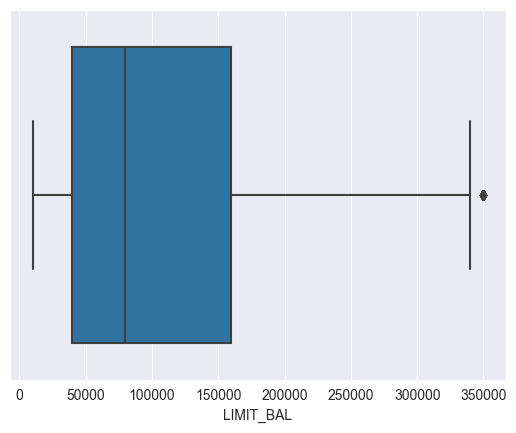

In [79]:
sns.boxplot(x="LIMIT_BAL",data=df_default_1)

In [81]:
df_default_0=df[df["target"]==0]

In [82]:
max_thresold_0=df_default_0["LIMIT_BAL"].quantile(0.95)
max_thresold_0

450000.0

In [83]:
df_default_0[df_default_0["LIMIT_BAL"]<max_thresold].shape[0]

20455

In [84]:
df_default_0=df_default_0[df_default_0["LIMIT_BAL"]<max_thresold]

In [85]:
df_default_0.shape

(20455, 25)

<Axes: xlabel='LIMIT_BAL'>

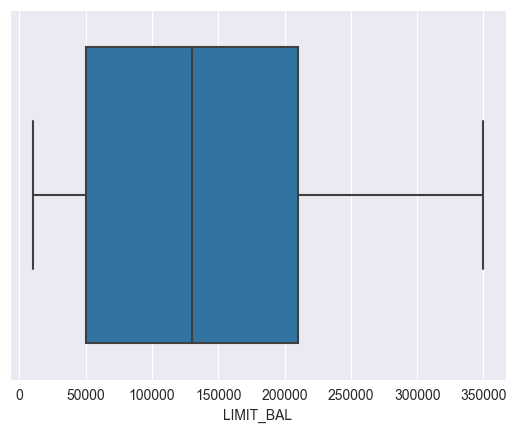

In [86]:
sns.boxplot(x="LIMIT_BAL",data=df_default_0)

In [87]:
df = pd.concat([df_default_0, df_default_1], ignore_index=True, sort=False)

In [88]:
df.shape

(26643, 25)

# Feature Selection

Information gain method

In [91]:
# # Dividing dependent and independent variables
X = df.drop("target", axis=1)
y = df["target"]

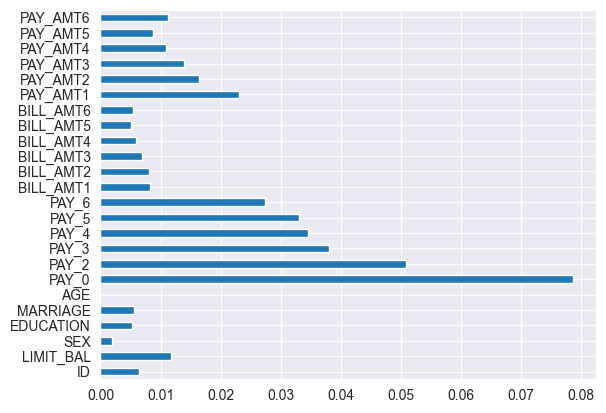

In [92]:
from sklearn.feature_selection import mutual_info_classif

importances=mutual_info_classif(X,y)
feat_importances=pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importances.plot(kind="barh")
plt.grid(True)
plt.show()

In [93]:
#feat_importances
#taking 0.01
#Limit_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT6

In [94]:
X=pd.DataFrame({"LIMIT_BAL":df["LIMIT_BAL"],"PAY_0":df["PAY_0"],"PAY_2":df["PAY_2"],"PAY_3":df["PAY_3"],"PAY_4":df["PAY_4"],"PAY_5":df["PAY_5"],"PAY_6":df["PAY_6"]})

In [95]:
X.head(2)

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,90000.0,0,0,0,0,0,0
1,50000.0,0,0,0,0,0,0


In [96]:
X.shape

(26643, 7)

In [97]:
y.value_counts()

target
0    20455
1     6188
Name: count, dtype: int64

In [98]:
# Sampling
# Balanacing dataset
from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X, y = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y)))

SMOTE Counter({0: 20455, 1: 20455})


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Machine Learning

Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)
rf_model=clf.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)

In [101]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      4158
           1       0.76      0.65      0.70      4024

    accuracy                           0.73      8182
   macro avg       0.73      0.73      0.73      8182
weighted avg       0.73      0.73      0.73      8182



In [102]:
confusion_matrix(y_test,y_pred)

array([[3325,  833],
       [1395, 2629]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

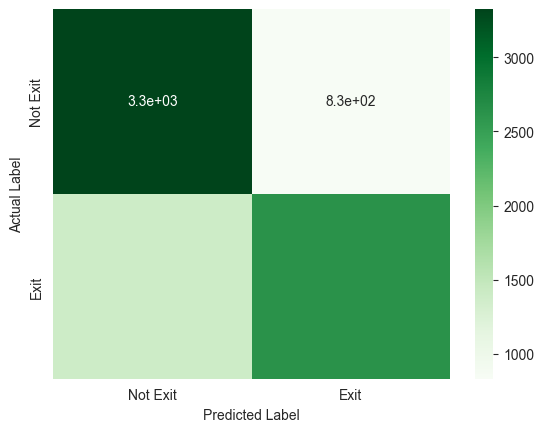

In [103]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')